## Exercise 1 - Classification using MNIST with 97 >= accuracy in the daset test

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto')

X, y = mnist['data'], mnist['target']

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size=0.2)

In [4]:
parameters = {'weights':('uniform','distance'), 'n_neighbors':[2, 4, 6]}

In [5]:
model = KNeighborsClassifier()

In [6]:
clf_grid = GridSearchCV(model, parameters)

In [7]:
clf_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6],
                         'weights': ('uniform', 'distance')})

In [9]:
clf_grid.score(X_valid, y_valid)

0.9734285714285714

In [10]:
clf_grid.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

## Exercise 2 

In [11]:
import matplotlib.pyplot as plt
from scipy.ndimage import shift

In [12]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [13]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

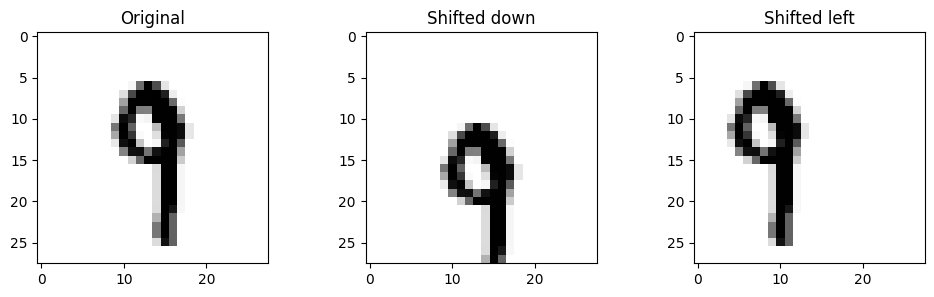

In [14]:
image = X_train[9] 
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original")
plt.imshow(image.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down")
plt.imshow(shifted_image_down.reshape(28, 28),
           interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left")
plt.imshow(shifted_image_left.reshape(28, 28),
           interpolation="nearest", cmap="Greys")

plt.show()

In [15]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((-1, 0), (1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [16]:
parameters = {'n_neighbors': 2, 'weights': 'distance'}

In [19]:
new_model = KNeighborsClassifier(**clf_grid.best_params_)

In [20]:
new_model.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [21]:
new_model.score(X_valid, y_valid)

0.9802142857142857